<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Uas_kp_junpito_salim_120450086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.[10 Poin] Jelaskan perbedaan antara Model Parallelism dan Data Parallelism dalam komputasi paralel pada deep learning!

model paralelism adalah model yang dalam pemodelannya di bagi menjadi beberapa bagian yang dapat di jalankam secara paralel pada beberapa alat proses seperti gpu atau cpu.

sedangkan data paralelism adalah model yang mana data yang akan di olah di bagi menjadi beberapa bagian yang dapat di jalankan secara paralel di beberapa processor atau cpu.

#2.[10 Poin] Berikan contoh dan ilustrasikan paralelisme pada Model DNN tersebut dengan skema :

Model Parallelism

pada skema model paralelism dari model di atas kita bisa membagi beberapa layer ke beberapa prosesor atau cpu, misalnya untuk layer satu sampai 3 kita jadikan sub-layer dan eksekusi di cpu1 dan untuk layer seterusnya di cpu2


Data Parallelism

untuk skema data paralelisme pada model di atas kita dapat membagi data training nya di beberapa bach yang akan di jalankan pada beberapa cpu atau gpu yang berberda

#3.[10 POIN] Lakukan input data image tersebut dan outputkan 9 gambar terakhir dalam dataset beserta dengan label kelas nya!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/tugas/pistachio-image-dataset-master.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import pathlib
data_dir = pathlib.Path('/tmp/pistachio-image-dataset/Pistachio_Image_Dataset')


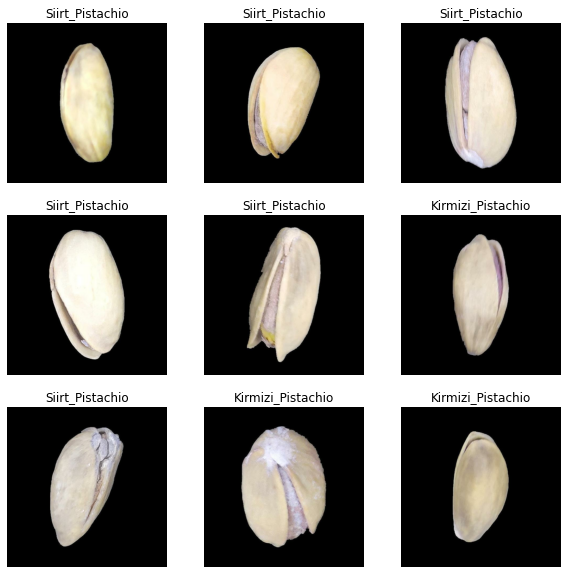

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #menampilkan gambar 9 terakhir
    plt.imshow(images[-i - 1].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


#4.[10 POIN] Lakukan data splitting dataset tersebut sehingga dataset terbagi menjadi data training dan data validation dengan rasio 70:30!

In [ ]:
batch_size = 32
img_height = 600
img_width = 600


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2148 files belonging to 2 classes.
Using 1504 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2148 files belonging to 2 classes.
Using 644 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['Kirmizi_Pistachio', 'Siirt_Pistachio']


#5.[15 POIN] Buatlah sebuah fungsi untuk membuat model DNN tersebut menggunakan library tensorflow dan keras dengan rincian parameter sebagai berikut:
Loss function: binary_crossentropy
Output Layer Activation function: sigmoid
Hidden Layer activation function : relu
Batch Size: 32
Epoch: 5
Evaluation metrics: Accuracy


In [ ]:
loss = 'binary_crossentropy'
output_activation = 'sigmoid'
hidden_activation = 'relu'
epochs = 5
evaluation_metrics = 'Accuracy'
input_shape = [600, 600, 3]
num_classes = len(train_ds.class_names)


In [ ]:
def create_DNN(input_shape, num_classes, loss, output_activation, hidden_activation, evaluation_metrics):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(input_shape=input_shape, scale=1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation=hidden_activation ),
    tf.keras.layers.Dense(100, activation=hidden_activation),
    tf.keras.layers.Dense(50, activation=hidden_activation),
    tf.keras.layers.Dense(1, activation=output_activation)
])
  model.compile(loss = loss,
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
model = create_DNN(input_shape, num_classes, loss, output_activation, hidden_activation, evaluation_metrics)

In [ ]:
model.summary(
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 600, 600, 3)       0         
                                                                 
 flatten (Flatten)           (None, 1080000)           0         
                                                                 
 dense (Dense)               (None, 300)               324000300 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 324,035,501
Trainable params: 324,035,501


#6.[15 POIN] Buatlah sebuah fungsi untuk melakukan proses training pada data training dataset tersebut! Visualisasikan perbandingan loss dan accuracy nya terhadap data validation! 

In [ ]:
@timeit
def train_model(model, train_ds, val_ds, batch_size, epochs):
  history = model.fit(train_ds, validation_data=val_ds, batch_size=batch_size, epochs=epochs)
  return history


In [ ]:
history = train_model(model, train_ds, val_ds, batch_size, epochs)

Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 12.5392 - accuracy: 0.6842 - val_loss: 2.1255 - val_accuracy: 0.8339
Epoch 2/5
47/47 [==============================] - 107s 2s/step - loss: 5.0082 - accuracy: 0.7533 - val_loss: 3.5090 - val_accuracy: 0.8043
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 2.1925 - accuracy: 0.8005 - val_loss: 1.3792 - val_accuracy: 0.8494
Epoch 4/5
47/47 [==============================] - 107s 2s/step - loss: 1.5278 - accuracy: 0.7886 - val_loss: 1.4538 - val_accuracy: 0.8354
Epoch 5/5
47/47 [==============================] - 114s 2s/step - loss: 2.4234 - accuracy: 0.7779 - val_loss: 1.7947 - val_accuracy: 0.8137
Training took 647.54 seconds


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.371896,0.862367,0.672296,0.860248
1,0.756920,0.823803,1.834923,0.737578
2,0.585877,0.846410,1.013155,0.795031
3,0.273650,0.887633,0.675283,0.838509
4,0.221247,0.916223,0.670326,0.847826


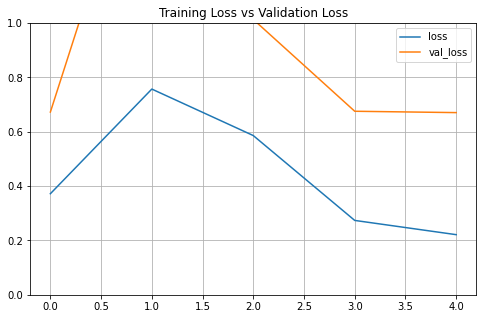

In [ ]:
df[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Training Loss vs Validation Loss')
plt.show()

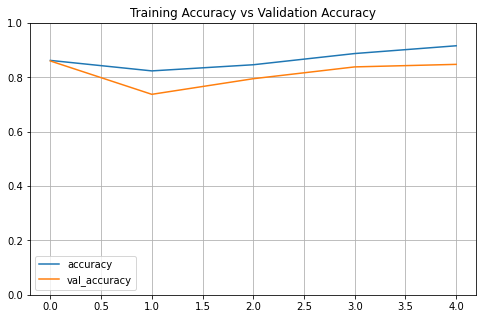

In [ ]:
df[['accuracy','val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

#7.[10 POIN] Buatlah sebuah decorator untuk menambahkan perhitungan waktu runtime dari fungsi training pada nomor 6! 

In [ ]:
import time

def timeit(func):
  def wrapper(*args, **kwargs):
    start = time.perf_counter()
    result = func(*args, **kwargs)
    end = time.perf_counter()
    print(f"Training took {end - start:.2f} seconds")
    return result
    wrapper.elapsed_times = []
  return wrapper

#8.[20 POIN] Lakukan 4 kali percobaan masing-masing menggunakan runtime GPU dan CPU. Buatlah Analisis Speedup antara  Tgpu (waktu training menggunakan GPU) dan Tcpu (waktu training menggunakan CPU) ! Visualisasikan perbandingannya menggunakan grafik!

In [ ]:
#cpu
for i in range(4):
  history = train_model(model, train_ds, val_ds, batch_size, epochs)


Epoch 1/5
47/47 [==============================] - 113s 2s/step - loss: 3.3528 - accuracy: 0.7786 - val_loss: 2.3390 - val_accuracy: 0.8183
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 2.7463 - accuracy: 0.7660 - val_loss: 3.8858 - val_accuracy: 0.7609
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 2.5015 - accuracy: 0.8052 - val_loss: 1.8101 - val_accuracy: 0.8137
Epoch 4/5
47/47 [==============================] - 111s 2s/step - loss: 1.4596 - accuracy: 0.8198 - val_loss: 2.2079 - val_accuracy: 0.7484
Epoch 5/5
47/47 [==============================] - 112s 2s/step - loss: 1.1438 - accuracy: 0.8245 - val_loss: 2.0284 - val_accuracy: 0.7453
Training took 647.56 seconds
Epoch 1/5
47/47 [==============================] - 111s 2s/step - loss: 1.3069 - accuracy: 0.8265 - val_loss: 1.2258 - val_accuracy: 0.7919
Epoch 2/5
47/47 [==============================] - 113s 2s/step - loss: 0.7777 - accuracy: 0.8431 - val_loss: 1.2390 - val_accuracy

AttributeError: ignored

In [ ]:
#gpu
for i in range(4):
  history = train_model(model, train_ds, val_ds, batch_size, epochs)


Epoch 1/5
47/47 [==============================] - 14s 221ms/step - loss: 11.3185 - accuracy: 0.6968 - val_loss: 4.3492 - val_accuracy: 0.8090
Epoch 2/5
47/47 [==============================] - 11s 222ms/step - loss: 4.3246 - accuracy: 0.7686 - val_loss: 6.7353 - val_accuracy: 0.6506
Epoch 3/5
47/47 [==============================] - 11s 220ms/step - loss: 3.0719 - accuracy: 0.7680 - val_loss: 8.6244 - val_accuracy: 0.6351
Epoch 4/5
47/47 [==============================] - 13s 276ms/step - loss: 2.3422 - accuracy: 0.8065 - val_loss: 1.7406 - val_accuracy: 0.8012
Epoch 5/5
47/47 [==============================] - 11s 216ms/step - loss: 1.6623 - accuracy: 0.7939 - val_loss: 1.2719 - val_accuracy: 0.8152
Training took 83.57 seconds
Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 1.2705 - accuracy: 0.8178 - val_loss: 1.2331 - val_accuracy: 0.8463
Epoch 2/5
47/47 [==============================] - 11s 217ms/step - loss: 1.6499 - accuracy: 0.7713 - val_loss: 2.2278 

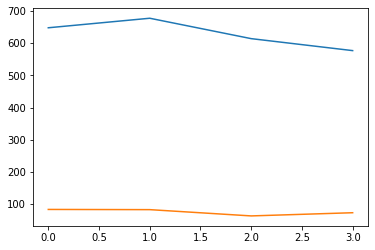

In [ ]:
cpu = [647.56, 677.14, 613.81, 576.65]
gpu = [83.57, 82.94, 63.46, 73.36]

plt.plot(range(len(cpu)), cpu, label='CPU')
plt.plot(range(len(gpu)), gpu, label='GPU')
plt.show()

In [ ]:
speedup = []

for i in range(len(cpu)):
  speedup.append(cpu[i] / gpu[i])

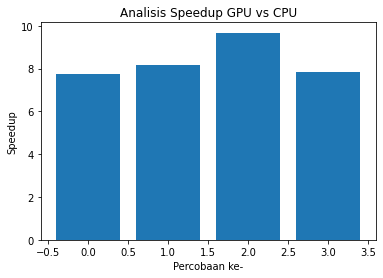

In [ ]:
plt.bar(range(len(speedup)), speedup)
plt.xlabel('Percobaan ke-')
plt.ylabel('Speedup')
plt.title('Analisis Speedup GPU vs CPU')
plt.show()